<a href="https://colab.research.google.com/github/StephenPast25/BCS_109/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bringing Data Into Colab**
I will start this research by finding some good data to do some experiments on. Finding the right data is a very important step on this project and is what everything should be based on. This data was found on Kaggle and is based on Insurance Companies. It is called "The Insurance Company (TIC) Benchmark" and contains information on customers of an insurance company. There is 86 variables on the data.

In [ ]:
#load pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/StephenPast25/BCS_109/master/tic_2000_eval_data.csv")

#create a second copy of the data just in case
df_original = df

#check the dimensions of the data
print('The dimensions of the data are: ', df.shape)

#show the beginning of the data
df.head()

The dimensions of the data are:  (4000, 85)


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,...,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,...,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,...,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


After finding the data and uploading it, we must help clear up the info by looking at many factors. These factors include checking for empty data and looking for unique values. If there is a question mark in any of the values we must get rid of it which luckily wasn't the case. We were also looking for nulls and the seeing the types of all the data which is non-null and numeric.

In [ ]:
#check if we have any empty data
df.isna().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
AZEILPL     0
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
Length: 85, dtype: int64

In [ ]:
#check how many unique values we have in each column
df.nunique()

MOSTYPE     40
MAANTHUI     9
MGEMOMV      6
MGEMLEEF     6
MOSHOOFD    10
            ..
AZEILPL      2
APLEZIER     3
AFIETS       4
AINBOED      2
ABYSTAND     2
Length: 85, dtype: int64

In [ ]:
#check for nulls
df.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
AZEILPL     0
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
Length: 85, dtype: int64

In [ ]:
#print all the unique values of my data
#we see that we have a question mark, and we need to get rid of that
for col in df:
    print(df[col].unique())

[33  6 39  9 31 30 35  4 10 34 36 38 11 40 25 41 23 22 13  5 32 24 12 29
  8 21 27 37  3  2  7 20  1 26 18 16 17 28 15 19]
[ 1  2  3  5  4 10  7  6  8]
[4 3 2 1 5 6]
[2 3 4 1 5 6]
[ 8  2  9  3  7  1 10  6  5  4]
[0 1 2 3 4 9 7 5 6]
[6 5 4 3 2 7 9 1 8 0]
[0 2 1 3 4 5]
[3 4 7 2 0 6 5 1 9 8]
[5 9 8 4 6 3 7 2 0 1]
[0 2 4 1 3 6 5 7]
[4 2 3 1 0 6 5 7 9 8]
[1 2 0 4 3 6 5 7 8 9]
[1 4 3 6 5 7 2 0 9 8]
[8 5 6 4 3 2 7 1 0 9]
[2 5 0 1 4 3 7 6 8 9]
[2 4 0 5 3 1 6 7 8 9]
[6 0 4 9 2 5 7 3 1 8]
[0 5 2 1 4 3 7 6 8 9]
[0 1 3 2 5 4]
[1 0 2 8 4 3 5 6 9]
[2 4 3 5 0 1 7 6 9 8]
[6 0 2 1 4 3 5 7 9 8]
[1 0 2 4 3 5 6 8 7 9]
[0 4 1 3 6 2 7 5 9 8]
[2 3 1 0 4 5 8 6 9 7]
[1 0 5 3 2 6 4 9 8 7]
[5 2 7 4 3 6 1 0 8 9]
[3 1 2 0 5 4 6 7 8]
[1 3 9 5 8 0 7 4 6 2]
[8 6 0 4 1 9 2 5 3 7]
[8 9 6 7 5 3 4 2 1 0]
[1 0 2 4 3 6 5 9 7]
[1 0 2 4 3 5 6 8 7 9]
[8 7 6 9 4 3 2 5 0 1]
[1 2 3 0 5 6 7 4 9 8]
[3 1 2 5 0 6 4 7 9 8]
[3 1 4 5 7 2 6 0 8 9]
[3 5 0 2 4 1 9 6 7 8]
[0 4 1 2 3 5 6 8 9 7]
[0 2 1 3 6 4 5]
[3 6 4 2 5 7 8 1 0 9]
[3 8 5 4

In [ ]:
#check the type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 85 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   4000 non-null   int64
 1   MAANTHUI  4000 non-null   int64
 2   MGEMOMV   4000 non-null   int64
 3   MGEMLEEF  4000 non-null   int64
 4   MOSHOOFD  4000 non-null   int64
 5   MGODRK    4000 non-null   int64
 6   MGODPR    4000 non-null   int64
 7   MGODOV    4000 non-null   int64
 8   MGODGE    4000 non-null   int64
 9   MRELGE    4000 non-null   int64
 10  MRELSA    4000 non-null   int64
 11  MRELOV    4000 non-null   int64
 12  MFALLEEN  4000 non-null   int64
 13  MFGEKIND  4000 non-null   int64
 14  MFWEKIND  4000 non-null   int64
 15  MOPLHOOG  4000 non-null   int64
 16  MOPLMIDD  4000 non-null   int64
 17  MOPLLAAG  4000 non-null   int64
 18  MBERHOOG  4000 non-null   int64
 19  MBERZELF  4000 non-null   int64
 20  MBERBOER  4000 non-null   int64
 21  MBERMIDD  4000 non-null   int64
 22  

**Scikit Learn**
We will then install Scikit Learn which is a software machine that can be used in Python. It is a library of different types of Algorithms that will help us get more information on the data.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer( missing_values = np.nan, strategy='median')
df = imp.fit_transform(df)

All the data used must be numerical and will check to see if this is the case with the data I found.

In [ ]:
#if we hadn't converted to numeric data, we wouldn't have been able to get the statistics
#Use the .describe method to get summary stats as well as see the count of nonnull data.
#The default behavior of this method is to only report on numeric columns.
df.describe

<bound method NDFrame.describe of       MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  ...  APLEZIER  AFIETS  AINBOED  ABYSTAND
0          33         1        4         2  ...         0       0        0         0
1           6         1        3         2  ...         0       0        0         0
2          39         1        3         3  ...         0       0        0         0
3           9         1        2         3  ...         0       0        0         0
4          31         1        2         4  ...         0       0        0         0
...       ...       ...      ...       ...  ...       ...     ...      ...       ...
3995       33         1        2         4  ...         0       0        0         0
3996       24         1        2         3  ...         0       0        0         0
3997       36         1        2         3  ...         0       0        1         0
3998       33         1        3         3  ...         0       0        0         0
3999        8         1        

**Get a report**
Make sure to install the right package first. This report I found will help describe more of the data and help profile it.

In [ ]:
!pip install pandas_profiling --upgrade

     |████████████████████████████████| 266kB 5.9MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 604kB 42.7MB/s 
     |████████████████████████████████| 3.1MB 41.2MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 296kB 47.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=0018e718bb737df42ccefa50915e306c0b3bc7c64d023b97d26926ec43671f48
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


Next I will begin profilling the data with the help of the report that was found.

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

**Creating Graphs and Getting Data**
I will now get graphs to better explain the data and show it in a more visual way. Multiple graphs such as line and bar graphs will be used.

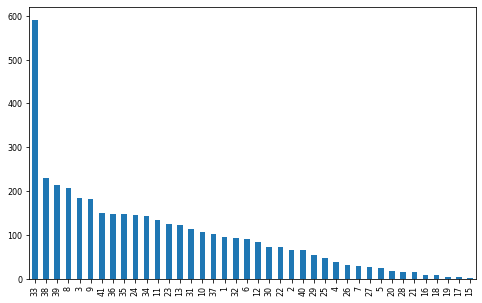

In [ ]:
#use value_counts to plot the different parts
plt.figure(figsize=(8,5))
df['MOSTYPE'].value_counts().plot(kind='bar', fontsize = 8)

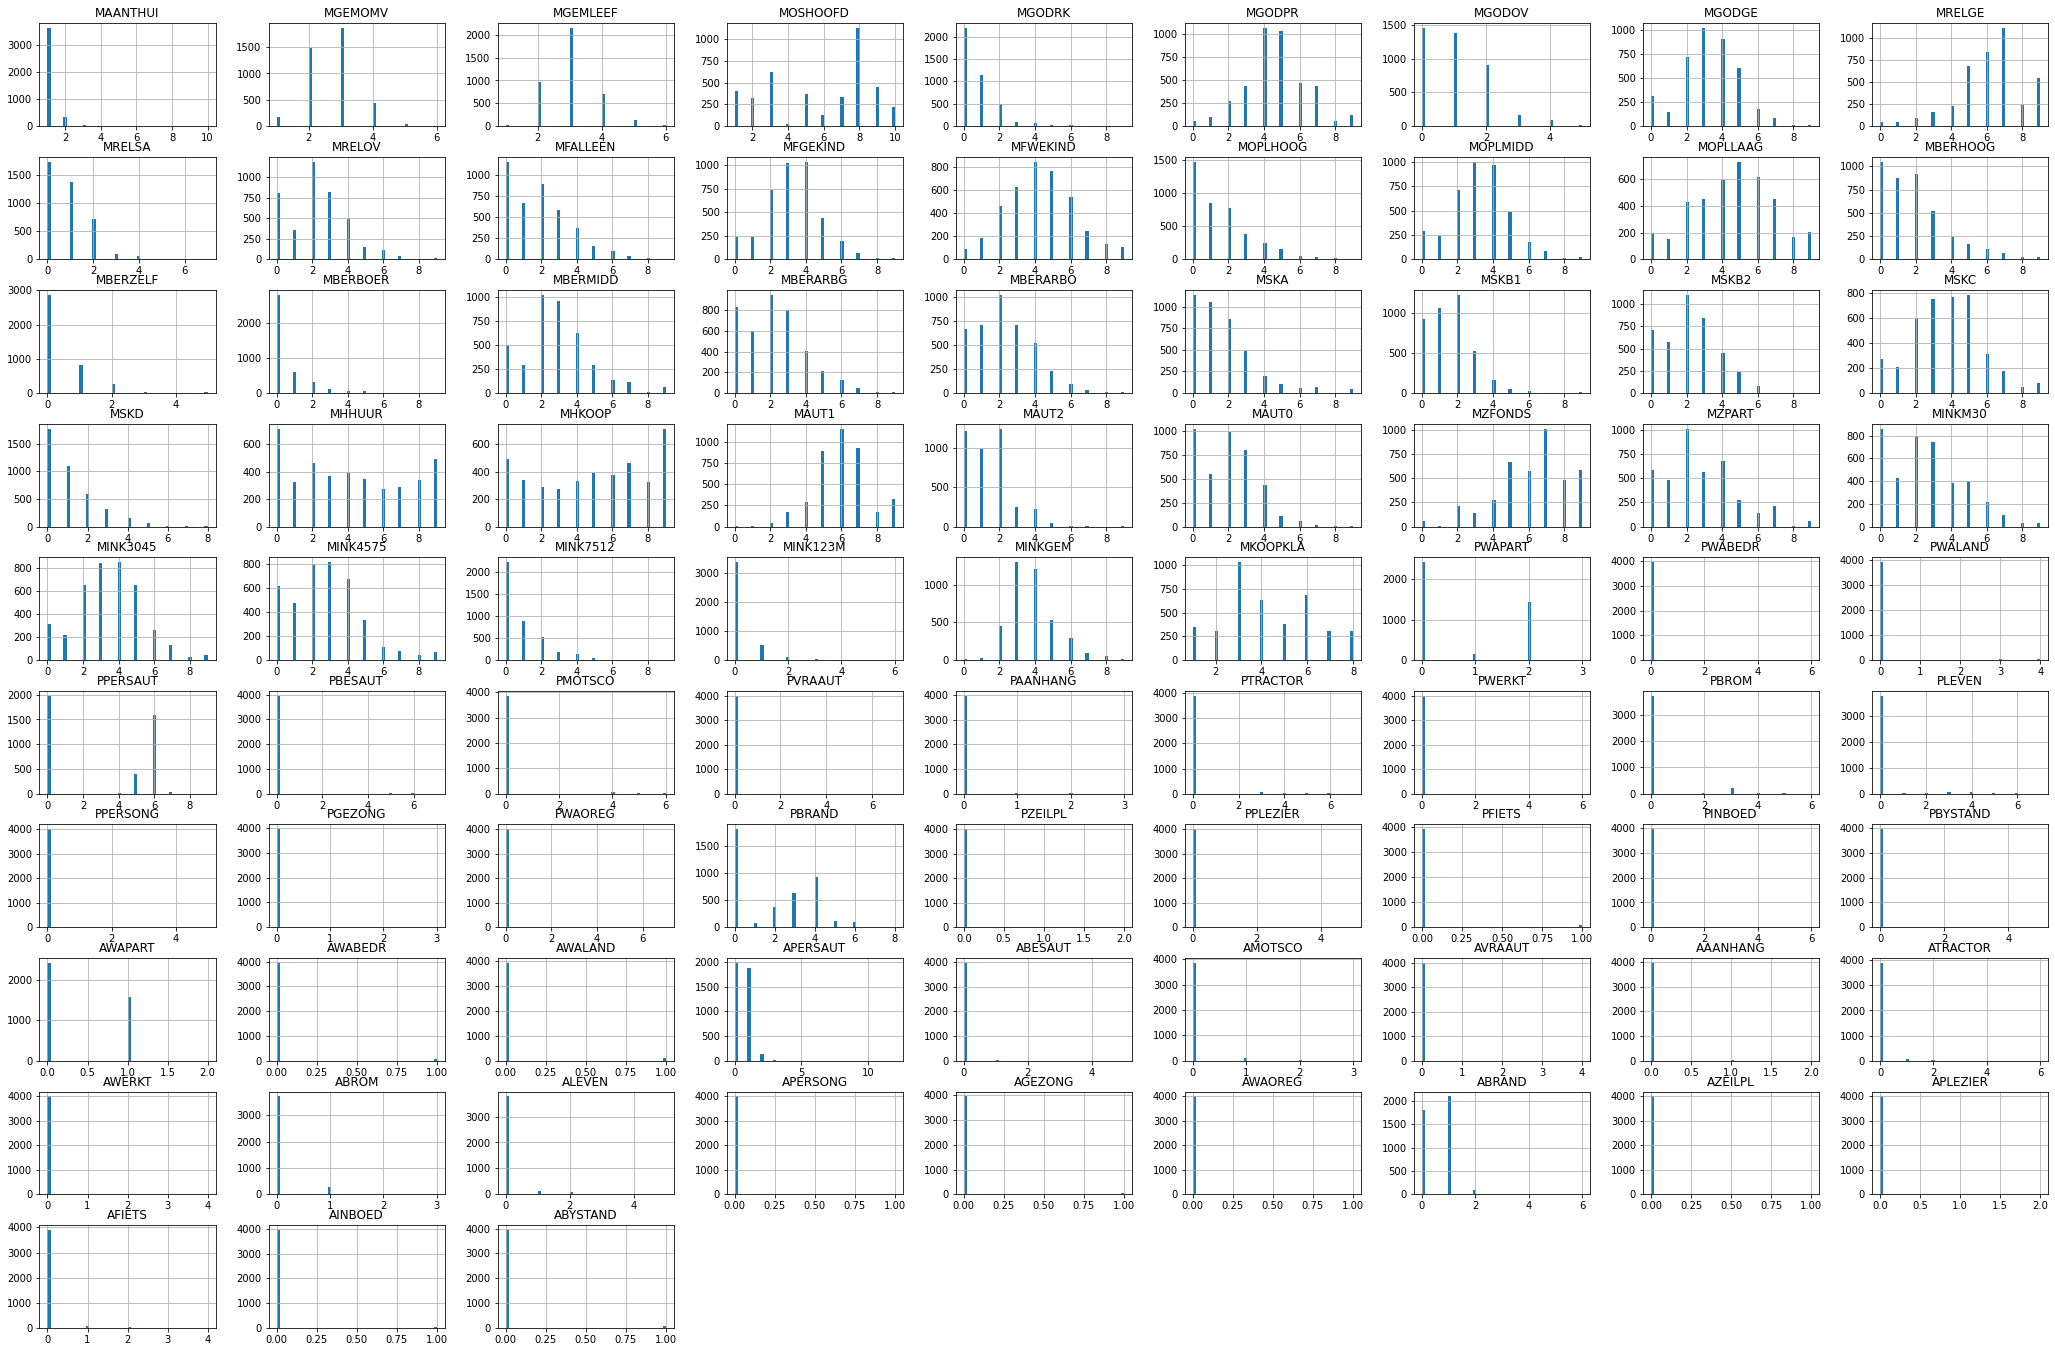

In [ ]:
df_numerical = df.drop(['MOSTYPE'],axis = 1)

df_numerical.hist(bins=50, figsize=(36,24))
plt.show()

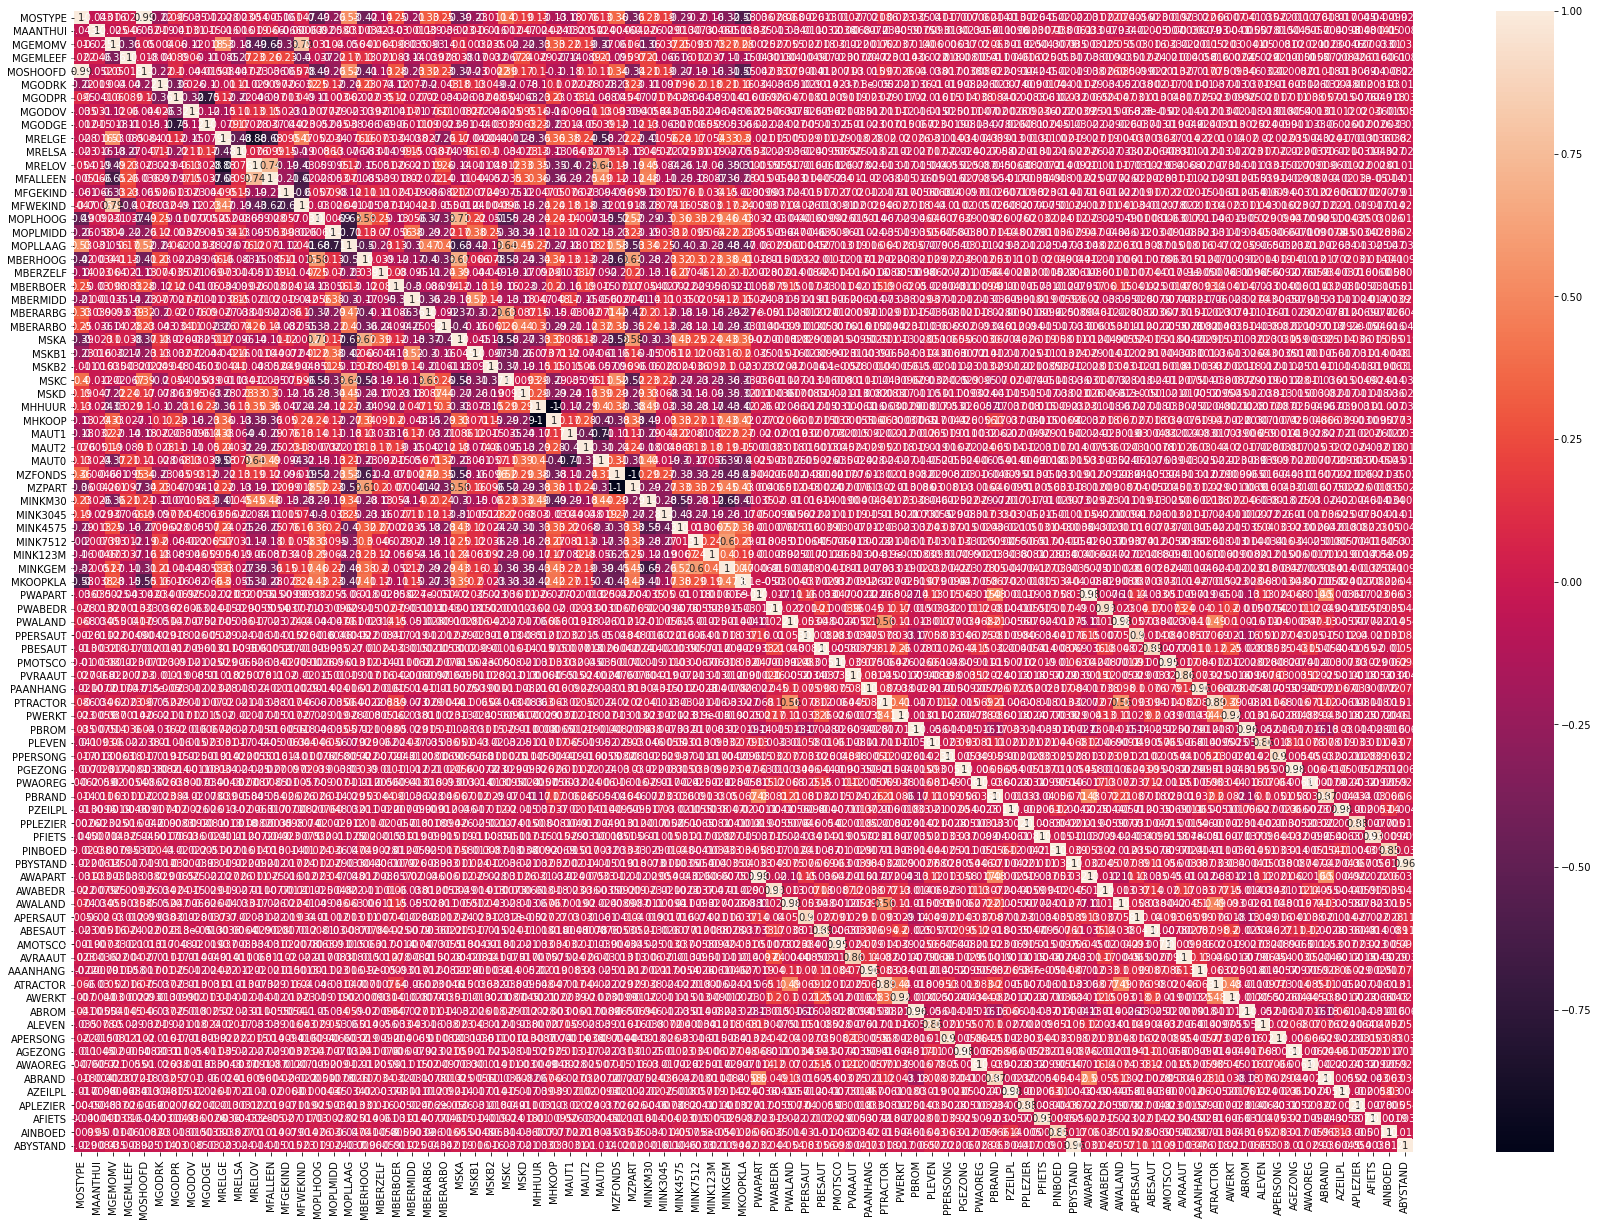

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(30,21))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#I see that MKOOPKLA has a lot of correlated features, so let's look at it by itself, ordered
corrMatrix["MKOOPKLA"].sort_values(ascending=False)

MKOOPKLA    1.000000
MINKGEM     0.466792
MZPART      0.428948
MOPLHOOG    0.426360
MHKOOP      0.421917
              ...   
MHHUUR     -0.422496
MZFONDS    -0.429632
MOPLLAAG   -0.470705
MOSHOOFD   -0.548517
MOSTYPE    -0.579332
Name: MKOOPKLA, Length: 85, dtype: float64

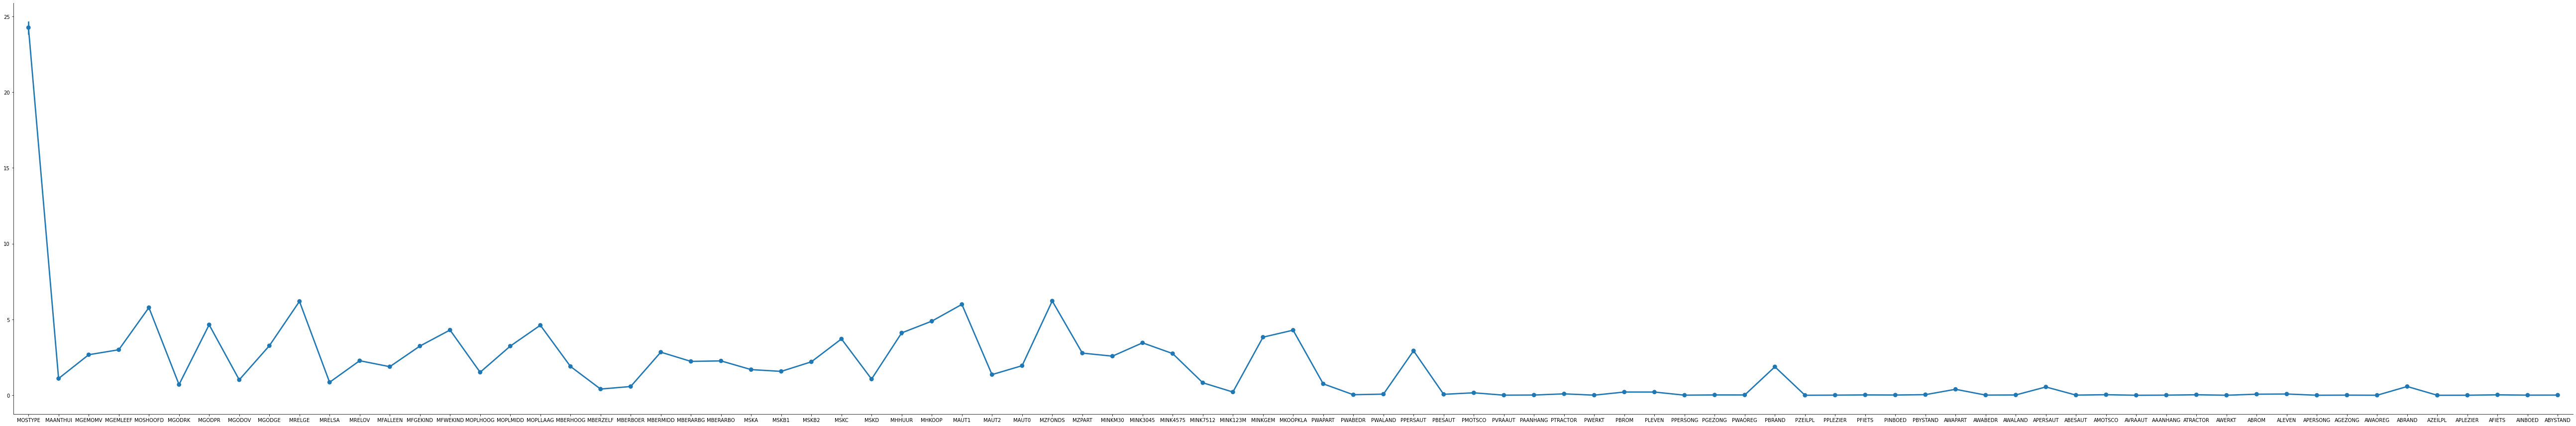

In [ ]:
sns.catplot(data=df , kind='point' , height=12, aspect=6)

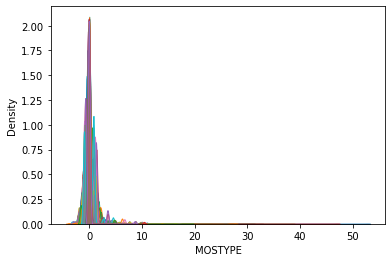

In [ ]:
normalized_df=(df-df.mean())/df.std()
for col in  df:
  sns.kdeplot(normalized_df[col], shade=True)

**Doing a Regression Test**
Creating a regression test will help show the usefulness of the data. It will help run the data and do a analysis on it. The data here is shown to have a 60% usefulness from the graphs made on it.

In [ ]:
from sklearn.linear_model import LinearRegression

#take out MKOOPKLA, because that is what we are going to be studying
y = df['MKOOPKLA'].copy()
x = df.drop(['MKOOPKLA'], axis = 1)

lin_reg = LinearRegression().fit(x,y)
r_sq = lin_reg.score(x, y)

print(r_sq)

0.576868777801863


In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               MKOOPKLA   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              576.7
Date:                Fri, 11 Dec 2020   Prob (F-statistic):                        0.00
Time:                        01:33:45   Log-Likelihood:                         -6707.4
No. Observations:                4000   AIC:                                  1.358e+04
Df Residuals:                    3916   BIC:                                  1.411e+04
Df Model:                          84                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Questions**
I will ask and answer 3 questions relating to the data and its information. This will ask the info based on how the 85 columms are based on statistics such as how many people own a boat or are married. The 4000 rows are based on the Zip Codes that use the Insurance the data is made for.

1.   What Ten Zip Codes have the highest number of houses?

In [ ]:
# ten largest values in column MAANTHUI 
df.nlargest(10, ['MAANTHUI'])

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
306,18,10,2,2,4,1,1,1,7,2,2,6,6,2,2,5,2,2,3,1,0,3,1,2,5,1,2,1,2,6,3,4,0,5,4,5,4,1,4,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3673,16,8,2,3,4,3,3,1,4,3,2,5,4,4,2,3,5,2,3,1,0,5,1,2,3,3,3,2,1,4,5,5,1,4,3,6,2,4,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1431,28,7,2,6,6,0,6,2,2,9,0,0,4,2,4,2,1,6,5,2,0,0,3,0,2,1,4,0,4,4,5,6,3,0,0,9,7,0,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3019,28,7,2,6,6,0,6,2,2,9,0,0,4,2,4,2,1,6,5,2,0,0,3,0,2,1,4,0,4,4,5,6,3,0,0,9,7,0,1,2,...,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3363,28,7,2,6,6,0,6,2,2,9,0,0,4,2,4,2,1,6,5,2,0,0,3,0,2,1,4,0,4,4,5,6,3,0,0,9,7,0,1,2,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3516,13,6,3,2,3,1,2,1,6,4,2,3,2,2,5,5,4,2,2,1,0,3,3,2,2,3,4,1,1,7,2,6,1,2,5,4,2,2,5,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3868,25,6,2,3,6,2,2,1,5,3,1,5,4,3,2,2,4,4,2,1,1,4,1,3,2,2,2,4,2,7,2,4,1,5,6,3,4,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
205,18,5,2,2,4,3,2,1,4,6,1,2,5,2,2,4,3,2,2,0,1,4,2,3,1,2,3,4,1,6,3,6,2,2,6,3,5,2,2,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1368,28,5,2,4,6,2,5,0,3,4,0,5,4,3,2,2,3,4,2,2,0,5,2,0,2,2,4,3,0,3,6,5,0,4,4,5,2,3,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271,22,4,2,3,5,2,2,2,4,3,3,4,3,5,2,2,5,3,2,0,1,3,1,4,1,2,3,3,1,6,3,4,0,5,7,2,3,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


When looking at all the zip codes on the data, the 306 zip code has the largest number of houses with 10 while the second is the 3673 zip code with 8.

2. Which Zip Code has the Highest Amount of Singles?

In [ ]:
# five largest values in column MFALLEEN 
df.nlargest(5, ['MFALLEEN'])

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
805,32,1,1,4,7,0,3,1,5,5,2,3,9,0,0,0,3,6,5,0,0,0,0,5,0,2,3,0,5,5,4,6,1,2,8,1,6,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1080,24,1,1,1,5,1,3,2,4,8,1,0,9,0,0,0,9,0,0,0,0,9,0,0,0,6,3,0,0,9,0,9,0,0,0,9,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1185,34,1,1,4,8,1,4,1,4,7,1,2,9,0,0,0,0,9,0,0,0,9,0,0,0,9,0,0,0,9,0,6,2,1,5,4,5,5,0,0,...,0,6,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1190,33,1,1,4,8,1,4,1,4,6,1,3,9,0,0,0,0,9,0,0,0,3,4,3,0,0,5,0,4,0,9,5,2,2,4,5,9,0,0,0,...,0,6,0,0,0,0,0,0,2,0,0,0,0,4,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2034,3,1,1,4,1,4,3,1,3,5,2,3,9,0,0,0,0,9,2,0,1,3,3,2,0,0,4,5,0,0,9,7,2,0,4,5,3,0,3,3,...,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Zip code 805 has the largest average income with 9 singles in its area.

3. Which Zip Code has the largest Amount of Married people?

In [ ]:
# five largest values in column MRELGE 
df.nlargest(5, ['MRELGE'])

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,6,1,3,3,2,3,4,2,2,9,0,0,0,5,4,4,4,2,4,3,0,2,0,2,6,1,0,2,0,0,9,5,4,0,3,6,1,3,4,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,1,2,4,1,0,7,2,0,9,0,0,1,7,2,3,4,2,2,0,0,4,3,1,2,3,1,4,1,7,2,7,0,2,7,2,3,3,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,10,1,4,2,3,0,7,0,2,9,0,0,0,2,7,2,3,5,0,0,0,5,2,3,0,4,0,5,0,0,9,6,1,2,6,3,0,7,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
12,38,1,3,2,9,0,6,3,0,9,0,0,0,4,5,2,4,4,2,2,0,4,2,1,2,3,2,4,0,9,0,7,0,2,6,3,2,5,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Zip Code 4 has the largest amount of married couples with it having 9 married people who are in the insurance company.